In [322]:
import pandas as pd
import time
from datetime import datetime, timedelta
#import matplotlib as plt
import matplotlib as mpl
import matplotlib.pyplot as plt      
%matplotlib inline
import numpy as np
import warnings
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KDTree
import os                       # for testing use only

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

In [323]:
def load_csv(file_name):
    df=pd.read_csv(file_name)
    return df

In [324]:
df = load_csv('games.csv')
print (df.head())
print (df.shape[0])
df.dropna()
print (df.shape[0])

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.500000e+12  1.500000e+12     13      outoftime  white   
1  l1NXvwaE   True  1.500000e+12  1.500000e+12     16         resign  black   
2  mIICvQHh   True  1.500000e+12  1.500000e+12     61           mate  white   
3  kWKvrqYL   True  1.500000e+12  1.500000e+12     61           mate  white   
4  9tXo1AUZ   True  1.500000e+12  1.500000e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

In [325]:
def one_dim_plot(sr, plot_type, axis):
    return sr.plot(kind=plot_type, ax=axis)
    
def get_frequent_elements(df, col_name, num_top_elements):
    res= df.value_counts(subset=[col_name]).head(num_top_elements)
    res.index = res.index.map(lambda x:x[0])
    return res.sort_index()

def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1,df_in_params.shape[0])
    axes = [axes]
    i=0
    for index, row in df_in_params.iterrows():
        df1 = get_frequent_elements(df, row['col_name'], row['num_top_elements'])
        one_dim_plot(df1, row['plot_type'], axes[i])
        i+=1


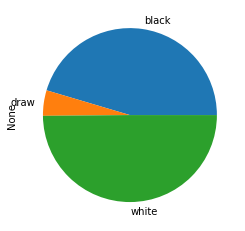

In [326]:
df_params = pd.DataFrame({'plot_type': ['pie'], 
                          'col_name': ['winner'],
                          'num_top_elements': [3]})

plot_frequent_elements(df, df_params)
# --- add additional code to check your code if needed:
### גרף שמתאר את החלוקה לניצחון על פי צבע

Text(0.5, 1.0, 'Player ratings and results')

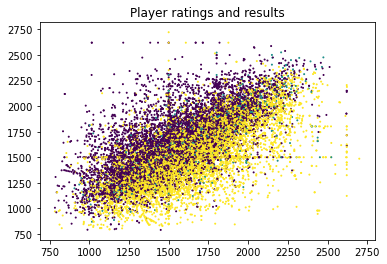

In [327]:
# מתאר את הניצחון של הלבן, סול את של השחור וכחול זה תיקו 
#גרף שמתאר את הדיורגים של השחקנים ואת הניצחונות שלהם. צבע צהוב 
#correlations, tuple_arr = get_highly_correlated_cols(df)
#n_plots = len(correlations)
n_plots = 1
#col_names = df.columns
fig, axes = plt.subplots(1, n_plots)
axes = [axes]
i=0
# for cor, coords in zip(correlations, tuple_arr):
name1 = 'white_rating'
name2 = 'black_rating'
title = "Player ratings and results"

from sklearn import preprocessing

  
labelencoder=preprocessing.LabelEncoder()
winners_numeric = labelencoder.fit_transform(df['winner'])

#df1 = cross_tabulation(df, name1, name2)
#one_dim_plot(df1, 'scatter', axes[i])
axes[i].scatter(df[name1], df[name2], c=winners_numeric, s=1)
axes[i].set_title(title)
#     i+=1

In [328]:
first_move = df['moves'].apply(lambda s:s.split(' ')[0])
df['first_move'] = first_move
df['first_move'].value_counts()
#יצרנו עמודה חדשה אשר מגדירה את המהלך הראשון


e4     12598
d4      4522
Nf3      725
c4       716
e3       416
g3       186
b3       173
f4       166
d3       131
Nc3       99
b4        88
c3        56
g4        38
h4        33
a4        28
a3        27
f3        23
Nh3       15
h3        14
Na3        4
Name: first_move, dtype: int64

In [329]:
df['turns_categorical'] = pd.cut(df['turns'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000])
df['turns_categorical'].value_counts()
#חלוקה למשתנה קטגוריאלי של מס' התורות
#n_plots = 1
#fig, axes = plt.subplots(1, n_plots)
#axes = [axes]
#i=0


#df1 = cross_tabulation(df, name1, name2)
#one_dim_plot(df1, 'scatter', axes[i])
#axes[i].scatter(df[name1], df[name2], c=winners_numeric, s=1)
#axes[i].set_title(title)

(50, 60]       2754
(40, 50]       2708
(100, 1000]    2536
(30, 40]       2377
(60, 70]       2227
(20, 30]       1771
(70, 80]       1684
(80, 90]       1249
(10, 20]       1114
(90, 100]       957
(0, 10]         681
Name: turns_categorical, dtype: int64

In [330]:

def one_dim_plot(sr, plot_type, axis):
    return sr.plot(kind=plot_type, ax=axis)
    

#col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
#              'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
#              'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
#              'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
##fig, axes = plt.subplots(1,1, figsize=(20,5))
##axes = [axes]
#sr_flowers = pd.Series([10, 20, 15, 12], index=['Lily', 'Orchid', 'Rose', 'Violet'])
#sr_snaks = pd.Series([7.8, 5.5, 6.2, 7.1, 8.3], index=['Cheetos', 'Doritos', 'Cookies', 'Chips', 'Chocolate'])
##one_dim_plot(df['turns_categorical'],'bar', axes[0])



In [331]:
turns_winner = pd.crosstab(df['turns_categorical'], df['winner'])

turns_winner

winner,black,draw,white
turns_categorical,,,
"(0, 10]",276,40,365
"(10, 20]",463,44,607
"(20, 30]",788,51,932
"(30, 40]",1080,49,1248
"(40, 50]",1240,56,1412
"(50, 60]",1323,53,1378
"(60, 70]",1072,68,1087
"(70, 80]",801,58,825
"(80, 90]",557,66,626


<BarContainer object of 11 artists>

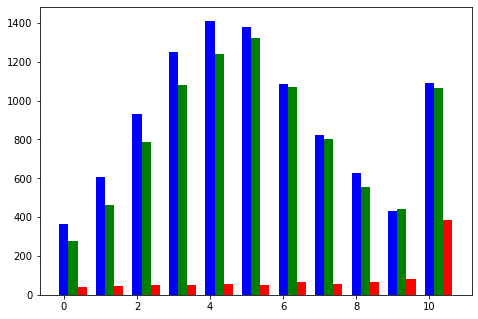

In [332]:
#מי ניצח בתלות בתורות#
X = np.arange(11)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, turns_winner['white'], color = 'b', width = 0.25)
ax.bar(X + 0.25, turns_winner['black'], color = 'g', width = 0.25)
ax.bar(X + 0.50, turns_winner['draw'], color = 'r', width = 0.25)

In [333]:
df['rating_diff'] = df.apply(lambda x: abs(x['black_rating'] - x['white_rating']), axis=1)
df['rating_avg'] = df.apply(lambda x: (x['black_rating'] + x['white_rating'])//2, axis=1)

df['rating_diff_categorical'] = pd.cut(df['rating_diff'], [-1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 400, 500, 600, 9999])
df['rating_diff_categorical'].value_counts()

(100, 150]     2653
(-1, 20]       2636
(20, 40]       1987
(150, 200]     1921
(40, 60]       1689
(60, 80]       1554
(200, 250]     1522
(300, 400]     1520
(80, 100]      1296
(250, 300]     1149
(400, 500]      882
(600, 9999]     691
(500, 600]      558
Name: rating_diff_categorical, dtype: int64

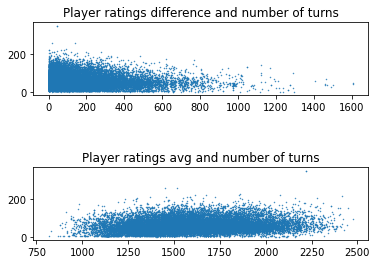

In [334]:
n_plots = 2
#col_names = df.columns
#השפעה של הפער בין בין הדירוגים על מפר התורות.אורך המשחק
#דירוג ממוצע של השחקנים-האם ששחקנים מומחים משחקים המשחק הוא יותר ארוך
fig, axes = plt.subplots(n_plots, 1)
axes = axes
i=0
# for cor, coords in zip(correlations, tuple_arr):
name1 = 'rating_diff'
name2 = 'turns'
title = "Player ratings difference and number of turns"

axes[i].scatter(df[name1], df[name2], s=0.2)
axes[i].set_title(title)
i+=1

name1 = 'rating_avg'
name2 = 'turns'
title = "Player ratings avg and number of turns"
axes[i].scatter(df[name1], df[name2], s=0.2)
axes[i].set_title(title)

plt.subplots_adjust(hspace=1)


In [335]:
df['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [336]:
X = df[['white_rating', 'black_rating']]
y = df['turns']
#לנבא את אורך המשחק על פי דירוג
#מראה כישלונות כי יצא 0.02 וניבוי מוצלח צריך להיות קרוב ל1 
#scale data
SSX=StandardScaler().fit_transform(X.values)
X=pd.DataFrame(SSX,index=X.index,columns=X.columns)
#SSy=StandardScaler().fit_transform(y.values)
#y=pd.DataFrame(SSy,index=y.index,columns=y.columns)

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

model = LinearRegression().fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Score:" + str(r2_score(y_test, y_predicted)))

print(y_test)
print(y_predicted)


Score:0.028446631332521122
1440       4
11724    113
16667     48
13077     99
7866      56
        ... 
305      116
8061      28
18387     98
11629     44
4349      62
Name: turns, Length: 4012, dtype: int64
[58.21251038 62.4179001  70.97288735 ... 63.74697194 65.45392057
 64.98207384]


In [337]:
def get_classifier_obj(classifier_name, params):
    #הגדרה של המסווגים
    if classifier_name=='KNN':
        if params is None:
            return KNeighborsClassifier()
        else:
            return KNeighborsClassifier(n_neighbors=params['n_neighbors'])
    elif classifier_name=='naive_bayes':
        return GaussianNB()
    elif classifier_name=='svm':
        return SVC()
    elif classifier_name=='decision_tree':
        if params is None:
            return DecisionTreeClassifier()
        else:
            return DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    elif classifier_name=='random_forest':
        if params is None:
            return RandomForestClassifier()
        else:
            return RandomForestClassifier(n_estimators=params['n_estimators'])


In [338]:
X = df[['white_rating', 'black_rating']]
y = df['winner']
test_ratio = 0.2
#ניסיון לנבא ניצחון על פי דירוג
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

params_knn = {'n_neighbors':7}
params_random_forest = {'n_estimators':51}
params_decision_tree = {'max_depth':4, 'min_samples_split':4}
clf_naive_bayes = get_classifier_obj("naive_bayes",None)
clf_svm = get_classifier_obj("svm",None)
clf_knn = get_classifier_obj("KNN",None)
clf_random_forest = get_classifier_obj("random_forest",None)
clf_decision_tree = get_classifier_obj("decision_tree",None)
clf_knn_with_params = get_classifier_obj("KNN",params_knn)
clf_random_forest_with_params = get_classifier_obj("random_forest",params_random_forest)    
clf_decision_tree_with_params = get_classifier_obj("decision_tree",params_decision_tree)

classifiers = [clf_naive_bayes, clf_svm, clf_knn, clf_random_forest, clf_decision_tree, clf_knn_with_params, clf_random_forest_with_params, clf_decision_tree_with_params]

for clf in classifiers:
    model = clf.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("Classifier " + str(clf) + " Score:" + str(f1_score(y_test, y_predicted, average='weighted')))

#print(y_test)
#print(y_predicted)
    

Classifier GaussianNB() Score:0.574483739443833
Classifier SVC() Score:0.5971958521721638
Classifier KNeighborsClassifier() Score:0.5791150546521154
Classifier RandomForestClassifier() Score:0.6076577332974207
Classifier DecisionTreeClassifier() Score:0.5727640970019626
Classifier KNeighborsClassifier(n_neighbors=7) Score:0.5755773553040666
Classifier RandomForestClassifier(n_estimators=51) Score:0.6054635235469554
Classifier DecisionTreeClassifier(max_depth=4, min_samples_split=4) Score:0.5368628007036852


In [339]:
X = df[['white_rating', 'black_rating']]
y = df['first_move']
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
#ניסיון לנבא את המהלך הראשון על פי הדירוג של השחקנים
params_knn = {'n_neighbors':7}
params_random_forest = {'n_estimators':51}
params_decision_tree = {'max_depth':4, 'min_samples_split':4}
clf_naive_bayes = get_classifier_obj("naive_bayes",None)
clf_svm = get_classifier_obj("svm",None)
clf_knn = get_classifier_obj("KNN",None)
clf_random_forest = get_classifier_obj("random_forest",None)
clf_decision_tree = get_classifier_obj("decision_tree",None)
clf_knn_with_params = get_classifier_obj("KNN",params_knn)
clf_random_forest_with_params = get_classifier_obj("random_forest",params_random_forest)    
clf_decision_tree_with_params = get_classifier_obj("decision_tree",params_decision_tree)

classifiers = [clf_naive_bayes, clf_svm, clf_knn, clf_random_forest, clf_decision_tree, clf_knn_with_params, clf_random_forest_with_params, clf_decision_tree_with_params]

for clf in classifiers:
    model = clf.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("Classifier " + str(clf) + " Score:" + str(f1_score(y_test, y_predicted, average='weighted')))

#print(y_test)
#print(y_predicted)
    

Classifier GaussianNB() Score:0.4850641245912807
Classifier SVC() Score:0.4719657849744558
Classifier KNeighborsClassifier() Score:0.49663861712735113
Classifier RandomForestClassifier() Score:0.5278919581851936
Classifier DecisionTreeClassifier() Score:0.495783570625924
Classifier KNeighborsClassifier(n_neighbors=7) Score:0.5063117474108303
Classifier RandomForestClassifier(n_estimators=51) Score:0.5278012373978985
Classifier DecisionTreeClassifier(max_depth=4, min_samples_split=4) Score:0.47194855458293633


In [340]:
X = df[['white_rating', 'black_rating']]
y = df['victory_status']
#ניבוי של הדירוג על איך הסתיים המשחק (שח או מט או ויתור)
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

params_knn = {'n_neighbors':7}
params_random_forest = {'n_estimators':51}
params_decision_tree = {'max_depth':4, 'min_samples_split':4}
clf_naive_bayes = get_classifier_obj("naive_bayes",None)
clf_svm = get_classifier_obj("svm",None)
clf_knn = get_classifier_obj("KNN",None)
clf_random_forest = get_classifier_obj("random_forest",None)
clf_decision_tree = get_classifier_obj("decision_tree",None)
clf_knn_with_params = get_classifier_obj("KNN",params_knn)
clf_random_forest_with_params = get_classifier_obj("random_forest",params_random_forest)    
clf_decision_tree_with_params = get_classifier_obj("decision_tree",params_decision_tree)

classifiers = [clf_naive_bayes, clf_svm, clf_knn, clf_random_forest, clf_decision_tree, clf_knn_with_params, clf_random_forest_with_params, clf_decision_tree_with_params]

for clf in classifiers:
    model = clf.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("Classifier " + str(clf) + " Score:" + str(f1_score(y_test, y_predicted, average='weighted')))


Classifier GaussianNB() Score:0.48773199713739934
Classifier SVC() Score:0.41403661575446676
Classifier KNeighborsClassifier() Score:0.49380518228830683
Classifier RandomForestClassifier() Score:0.522260016887366
Classifier DecisionTreeClassifier() Score:0.48678782680350735
Classifier KNeighborsClassifier(n_neighbors=7) Score:0.4956320109718075
Classifier RandomForestClassifier(n_estimators=51) Score:0.5154224763266408
Classifier DecisionTreeClassifier(max_depth=4, min_samples_split=4) Score:0.438900315265172
